<a href="https://colab.research.google.com/github/sommizzu/AWS-NLP-STUDY/blob/main/Teach_2day.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 활성화 함수

## 계단 함수

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

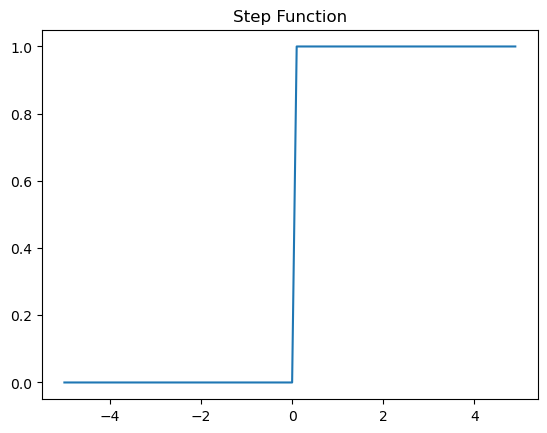

In [ ]:
def step( x ):
    return np.array( x > 0, dtype = np.int64 )

x = np.arange( -5.0, 5.0, 0.1 )
y = step( x )
plt.title( 'Step Function' )
plt.plot( x, y )
plt.show()

## Sigmoid 함수

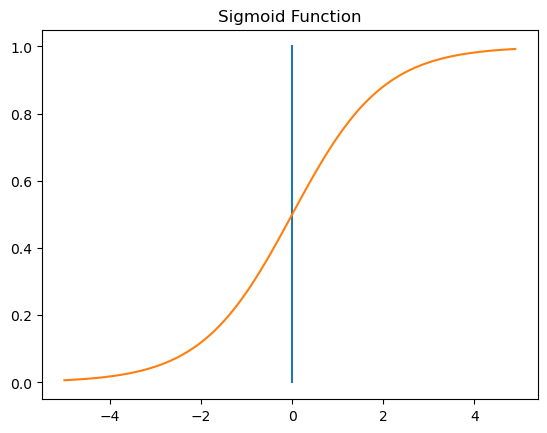

In [ ]:
def sigmoid( x ):
    return 1 / ( 1 + np.exp( -x ) )

x = np.arange( -5.0, 5.0, 0.1 )
y = sigmoid( x )
plt.title( 'Sigmoid Function' )
plt.plot( [ 0, 0 ], [ 1.0, 0.0 ] ) # 중간 점선
plt.plot( x, y )
plt.show()

## 하이퍼볼릭탄젠트 함수

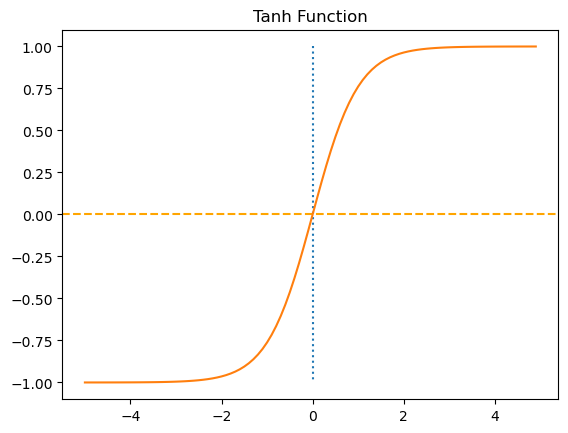

In [ ]:
x = np.arange( -5.0, 5.0, 0.1 )
y = np.tanh( x )

plt.title( 'Tanh Function' )
plt.plot( [ 0, 0 ], [ 1.0, -1.0 ], ':' ) # 중간 점선
plt.axhline( y = 0, color = 'orange', linestyle = '--' )
plt.plot( x, y )
plt.show()

## ReLU 함수

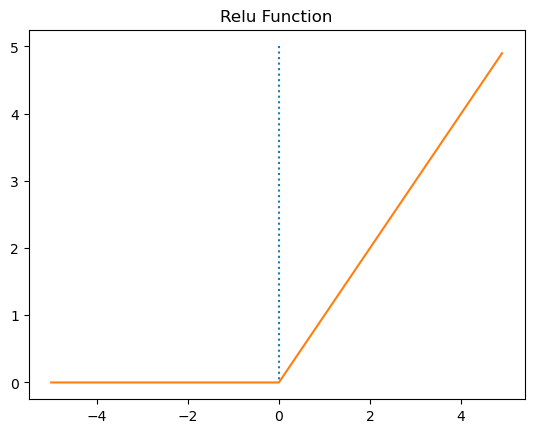

In [ ]:
def relu( x ):
    return np.maximum( 0, x )

x = np.arange( -5.0, 5.0, 0.1 )
y = relu( x )

plt.title( 'Relu Function' )
plt.plot( [ 0, 0 ], [ 5.0, 0.0 ], ':' ) # 중간 점선
plt.plot( x, y )
plt.show()

## Leaky ReLU

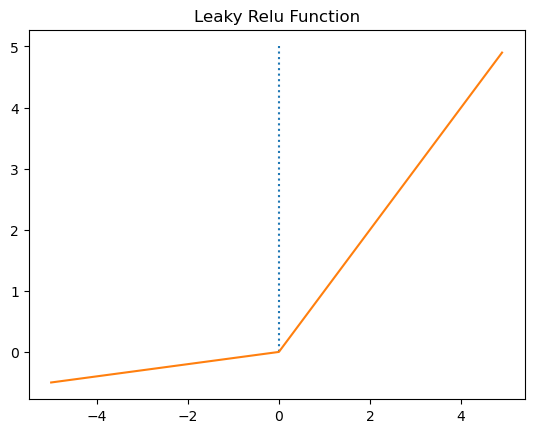

In [ ]:
a = 0.1

def leaky_relu( x ):
    return np.maximum( a * x, x )

x = np.arange( -5.0, 5.0, 0.1 )
y = leaky_relu( x )

plt.title( 'Leaky Relu Function' )
plt.plot( [ 0, 0 ], [ 5.0, 0.0 ], ':' ) # 중간 점선
plt.plot( x, y )
plt.show()

## Softmax 함수

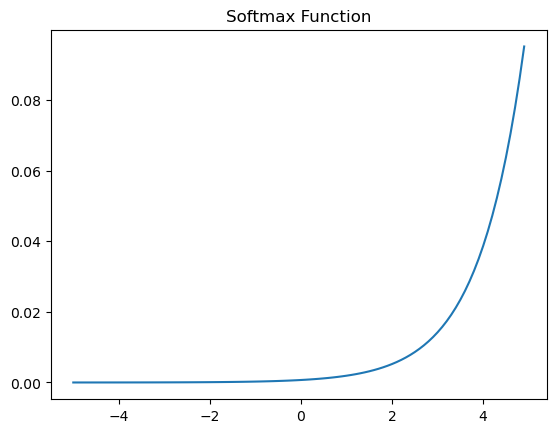

In [ ]:
x = np.arange( -5.0, 5.0, 0.1 )
y = np.exp( x ) / np.sum( np.exp( x ) )

plt.title( 'Softmax Function' )
plt.plot( x, y )
plt.show()

In [ ]:
!python --version

Python 3.8.1


## Tensorflow 설치

In [ ]:
!conda env list

# conda environments:
#
base                     C:\ProgramData\anaconda3
nlpenv                *  C:\Users\NIPA-34\.conda\envs\nlpenv



In [ ]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/5b/6f/8b125d126d54061c0be610b135aaf2f8960f55c2e185ac32445e4a5012d5/tensorflow-2.13.0-cp38-cp38-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.13.0 from https://files.pythonhosted.org/packages/38/ba/dd4d998a852451e98dc009ecb208bbb0eeb0c8252dc35b7c4e1050762b36/tensorflow_intel-2.13.0-cp38-cp38-win_amd64.whl.metadata
     ---------------------------------------- 0.0/126.5 kB ? eta -:--:--
     -------------------------------------- 126.5/126.5 kB 3.6 MB/s eta 0:00:00
  Obtaining dependency information for flatbuffers>=23.1.21 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/57.5 kB ? eta -:--:--
     ---------------------------------------- 57.5/57.5 kB 3.1 MB/s eta 0:00:00
  Obtaining dependency info

In [ ]:
import tensorflow as tf

In [ ]:
print( f'Tensorflow version : {tf.__version__}' )

Tensorflow version : 2.13.0


### Tensorflow를 이용한 DNN 작성

#### Data load 및 학습 데이터 scale 변환

In [ ]:
mnist = tf.keras.datasets.mnist

( X_train, y_train ), ( X_test, y_test ) = mnist.load_data()

print( len( X_train ), len( y_train ) )
print( len( X_test ), len( y_test ) )

60000 60000
10000 10000


In [ ]:
X_train[ 0 ][ 0 ]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

In [ ]:
y_train[ 0 ]

5

In [ ]:
X_train, X_test = X_train / 255.0, X_test / 255.0

#### DNN 모델 구성

In [ ]:
model = tf.keras.models.Sequential( [
    tf.keras.layers.Flatten( input_shape = ( 28, 28 ) ),
    tf.keras.layers.Dense( 128, activation = 'relu' ),
    tf.keras.layers.Dense( 64, activation = 'relu' ),
    tf.keras.layers.Dense( 32, activation = 'relu' ),
    tf.keras.layers.Dense( 10, activation = 'softmax' )
])

In [ ]:
model = tf.keras.models.Sequential()
model.add( tf.keras.layers.Flatten( input_shape = ( 28, 28 ) ) )
model.add( tf.keras.layers.Dense( 128, activation = 'relu' ) )
model.add( tf.keras.layers.Dropout( 0.2 ) )
model.add( tf.keras.layers.Dense( 64, activation = 'relu' ) )
model.add( tf.keras.layers.Dropout( 0.2 ) )
model.add( tf.keras.layers.Dense( 32, activation = 'relu' ) )
model.add( tf.keras.layers.Dropout( 0.2 ) )
model.add( tf.keras.layers.Dense( 10, activation = 'softmax' ) )

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)               

In [ ]:
model.compile( optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy',
               metrics = [ 'accuracy' ] )

In [ ]:
model.fit( X_train, y_train, epochs = 10, validation_split = 0.2 )

Epoch 1/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1112 - accuracy: 0.9683 - val_loss: 0.0999 - val_accuracy: 0.9722
Epoch 2/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0984 - accuracy: 0.9716 - val_loss: 0.1004 - val_accuracy: 0.9732
Epoch 3/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0941 - accuracy: 0.9726 - val_loss: 0.1004 - val_accuracy: 0.9728
Epoch 4/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0852 - accuracy: 0.9752 - val_loss: 0.1040 - val_accuracy: 0.9751
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0841 - accuracy: 0.9753 - val_loss: 0.0997 - val_accuracy: 0.9744
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0783 - accuracy: 0.9771 - val_loss: 0.0995 - val_accuracy: 0.9762
Epoch 7/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0706 - accuracy: 0.9791 - val_loss: 0.1024 - val_accu

In [ ]:
model.evaluate( X_test, y_test, verbose = 2 )

313/313 - 0s - loss: 0.1007 - accuracy: 0.9752 - 480ms/epoch - 2ms/step


[0.10066675394773483, 0.9751999974250793]